# Hasselt Rainfall

In [1]:
# Load Packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data Frame
df = pd.read_csv("hasselt rainfall data monthly.csv")
df.head(20)

,# Monthly homogenized climate series,Unnamed: 1,Unnamed: 2
0,# Source : Royal Meteorological Institute of B...,NaN,NaN
1,# Variable : Monthly precipitation in mm (RR),NaN,NaN
2,# Series name : HASSELT,NaN,NaN
3,# Series code : 1066,NaN,NaN
4,# Format: each row contains the year - the mon...,NaN,NaN
5,# File produced on : 2024-09-02 (YYYY-MM-DD),NaN,NaN
6,#,NaN,NaN
7,YY,MM,RR
8,1952,3,63.1
9,1952,4,4.2


In [3]:
df.shape

(774, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   # Monthly homogenized climate series  774 non-null    object
 1   Unnamed: 1                            767 non-null    object
 2   Unnamed: 2                            767 non-null    object
dtypes: object(3)
memory usage: 18.3+ KB


In [5]:
df.describe(include="all")

,# Monthly homogenized climate series,Unnamed: 1,Unnamed: 2
count,774,767,767
unique,72,13,551
top,1960,3,36.5
freq,12,64,5


# Data PreProcessing

In [6]:
# Keep only the rows where the first column contains only digits
df_clean = df[df[df.columns[0]].str.isnumeric()]

# Reset Index
df_clean = df_clean.reset_index(drop=True)

# Rename Columns
df_clean.columns = ["Year", "Month", "Rainfall_mm"]

# Convering Rainfall As A Numeric
df_clean["Rainfall_mm"] = pd.to_numeric(df_clean["Rainfall_mm"], errors = "coerce")

df_clean.head()

,Year,Month,Rainfall_mm
0,1952,3,63.1
1,1952,4,4.2
2,1952,5,32.1
3,1952,6,33.3
4,1952,7,70.4


# Clean Data Frame Info

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         766 non-null    object 
 1   Month        766 non-null    object 
 2   Rainfall_mm  766 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.1+ KB


In [8]:
df_clean.isnull().sum()

Year           0
Month          0
Rainfall_mm    0
dtype: int64

In [9]:
df_clean.describe(include="all")

,Year,Month,Rainfall_mm
count,766,766,766.000000
unique,64,12,NaN
top,1953,3,NaN
freq,12,64,NaN
mean,NaN,NaN,65.001958
std,NaN,NaN,34.797397
min,NaN,NaN,0.000000
25%,NaN,NaN,39.975000
50%,NaN,NaN,60.250000
75%,NaN,NaN,83.675000


# 1. Basic Data Statistics

In [10]:
# Calculating Mean Rainfall Overall
overall_mean = df_clean["Rainfall_mm"].mean()

# Calculating Mean Rainfall Per Month
per_month = df_clean.groupby("Month")["Rainfall_mm"].mean()

# Calculating Mean Rainfall Per Year
per_year = df_clean.groupby("Year")["Rainfall_mm"].mean()

print("Overall Mean Value:", overall_mean)
print("\nPer Month Mean Value:", per_month)
print("\nPer Year Mean Value:", per_year)

Overall Mean Value: 65.00195822454307

Per Month Mean Value: Month
1     63.690476
10    63.395313
11    68.976562
12    73.203125
2     55.185714
3     56.314062
4     47.506250
5     61.010937
6     74.751563
7     75.750000
8     78.559375
9     61.506250
Name: Rainfall_mm, dtype: float64

Per Year Mean Value: Year
1952    66.770000
1953    45.800000
1954    62.291667
1955    52.516667
1956    56.875000
          ...    
2011    59.291667
2012    70.575000
2013    56.566667
2014    66.283333
2015    61.991667
Name: Rainfall_mm, Length: 64, dtype: float64


In [11]:
# Calculating Median Overall
overall_median = df_clean["Rainfall_mm"].median()

# Calculating Median Per Month
per_month = df_clean.groupby("Month")["Rainfall_mm"].median()

print("\nOverall Median Value:", overall_median)
print("\nPer Month Median Value:", per_month)


Overall Median Value: 60.25

Per Month Median Value: Month
1     61.30
10    62.30
11    73.45
12    69.50
2     48.40
3     50.40
4     43.15
5     57.00
6     67.30
7     66.80
8     62.55
9     56.00
Name: Rainfall_mm, dtype: float64


In [12]:
# Minimum & Maximum Rainfall Values overall
overall_min_rainfall = df_clean["Rainfall_mm"].min()
overall_max_rainfall = df_clean["Rainfall_mm"].max()

# Minimum & Maximum Rainfall Values Per Month
min_rainfall_per_month = df_clean.groupby("Month")["Rainfall_mm"].min()
max_rainfall_per_month = df_clean.groupby("Month")["Rainfall_mm"].max()

print("\nOverall Minimum Rainfall Value:", overall_min_rainfall)
print("\nOverall Maximum Rainfall Value:", overall_max_rainfall)
print("\nPer Month Minimum Rainfall Value:", min_rainfall_per_month)
print("\nPer Month Maximum Rainfall Value:", max_rainfall_per_month)


Overall Minimum Rainfall Value: 0.0

Overall Maximum Rainfall Value: 189.4

Per Month Minimum Rainfall Value: Month
1      8.5
10     6.3
11     9.6
12    15.6
2      3.6
3      4.9
4      0.0
5     13.2
6     12.0
7     10.0
8     13.4
9      6.5
Name: Rainfall_mm, dtype: float64

Per Month Maximum Rainfall Value: Month
1     130.3
10    151.2
11    130.4
12    156.0
2     153.9
3     146.9
4     112.1
5     157.2
6     169.6
7     189.4
8     186.7
9     187.9
Name: Rainfall_mm, dtype: float64


In [13]:
# Overall Standard Deviation & Variance
std_overall = df_clean["Rainfall_mm"].std()
var_overall = df_clean["Rainfall_mm"].var()

# Per Month Standard Deviation & Variance
std_per_month = df_clean.groupby("Month")["Rainfall_mm"].std()
var_per_month = df_clean.groupby("Month")["Rainfall_mm"].var()

print("\nOverall Standard Deviation Value:", std_overall)
print("\nOverall Variance Value:", var_overall)
print("\nPer Month Standard Deviation Value:", std_per_month)
print("\nPer Month Variance Value:", var_per_month)


Overall Standard Deviation Value: 34.79739730073849

Overall Variance Value: 1210.858858905442

Per Month Standard Deviation Value: Month
1     26.595899
10    34.018223
11    28.854830
12    33.863512
2     29.887347
3     28.402028
4     27.742094
5     30.890128
6     35.306890
7     39.515486
8     43.827435
9     41.595432
Name: Rainfall_mm, dtype: float64

Per Month Variance Value: Month
1      707.341843
10    1157.239501
11     832.601188
12    1146.737450
2      893.253502
3      806.675196
4      769.623770
5      954.200037
6     1246.576505
7     1561.473651
8     1920.844038
9     1730.179960
Name: Rainfall_mm, dtype: float64


In [14]:
# Z-Test for August Rainfall
jun_rainfall = df_clean[df_clean["Month"] == 6]["Rainfall_mm"]

# Z-Test Formula
z_test = (jun_rainfall.mean() - overall_mean) / (std_overall / np.sqrt(len(jun_rainfall)))

print("June Rainfall Z-Test:", z_test)

June Rainfall Z-Test: nan


In [15]:
# Quartile statistics for rainfall
q1 = df_clean["Rainfall_mm"].quantile(.25)
q2 = df_clean["Rainfall_mm"].quantile(.50)
q3 = df_clean["Rainfall_mm"].quantile(.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 39.975
Q2: 60.25
Q3: 83.675
IQR: 43.699999999999996


In [18]:
# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Detect outliers
outliers = df_clean[(df_clean["Rainfall_mm"] < lower_bound) | (df_clean["Rainfall_mm"] > upper_bound)]

print("Number of Outliers:", len(outliers))
print(outliers)

Lower Bound: -25.574999999999996
Upper Bound: 149.225
Number of Outliers: 21
     Year Month  Rainfall_mm
66   1957     9        163.2
102  1960     9        153.9
135  1963     6        169.6
160  1965     7        164.2
165  1965    12        156.0
198  1968     9        150.0
340  1980     7        170.0
386  1984     5        157.2
390  1984     9        187.9
423  1987     6        160.4
436  1988     7        164.6
485  1992     8        184.4
533  1996     8        186.7
558  1998     9        176.7
559  1998    10        151.2
573  1999    12        149.6
580  2000     7        166.6
599  2002     2        153.9
653  2006     8        184.2
713  2011     8        151.8
748  2014     7        189.4


In [19]:
# Removing Outliers
df_no_outliers = df_clean[(df_clean["Rainfall_mm"] >= lower_bound) & (df_clean["Rainfall_mm"] <= upper_bound)]

print("Orginal Size:", df_clean.shape)
print("After Removing Outliers:", df_no_outliers.shape)

Orginal Size: (766, 3)
After Removing Outliers: (745, 3)


# 2. Data Visualization

# What is the total rainfall of per year?

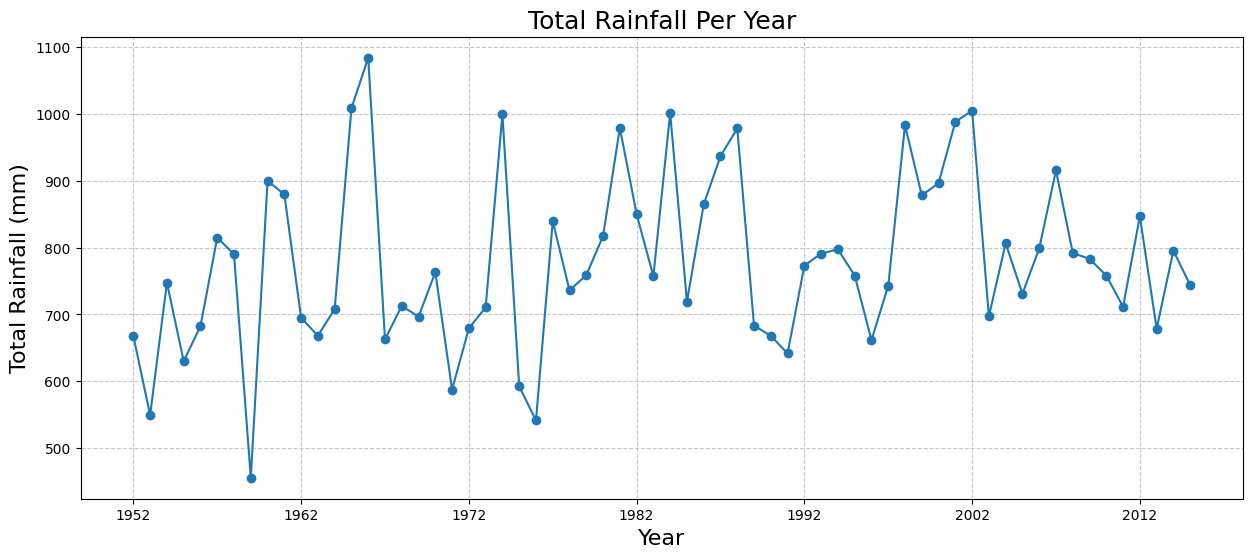

In [27]:
# Line Chart
plt.figure(figsize=(15, 6))
df_clean.groupby("Year")["Rainfall_mm"].sum().plot(kind="line", marker="o")
plt.title("Total Rainfall Per Year", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Rainfall (mm)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# What is the average rainfall of per month?

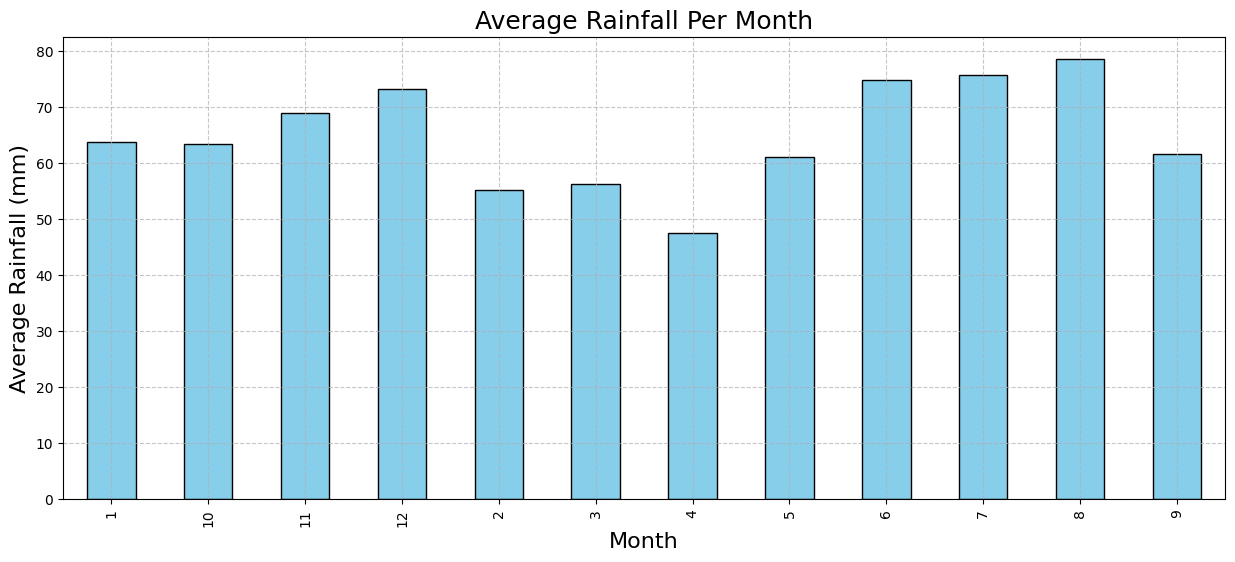

In [30]:
# Bar Chart
plt.figure(figsize=(15, 6))
df_clean.groupby("Month")["Rainfall_mm"].mean().plot(kind="bar", color="Skyblue", edgecolor="Black")
plt.title("Average Rainfall Per Month", fontsize=18)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Rainfall (mm)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# What is the monthly rainfall distribution?

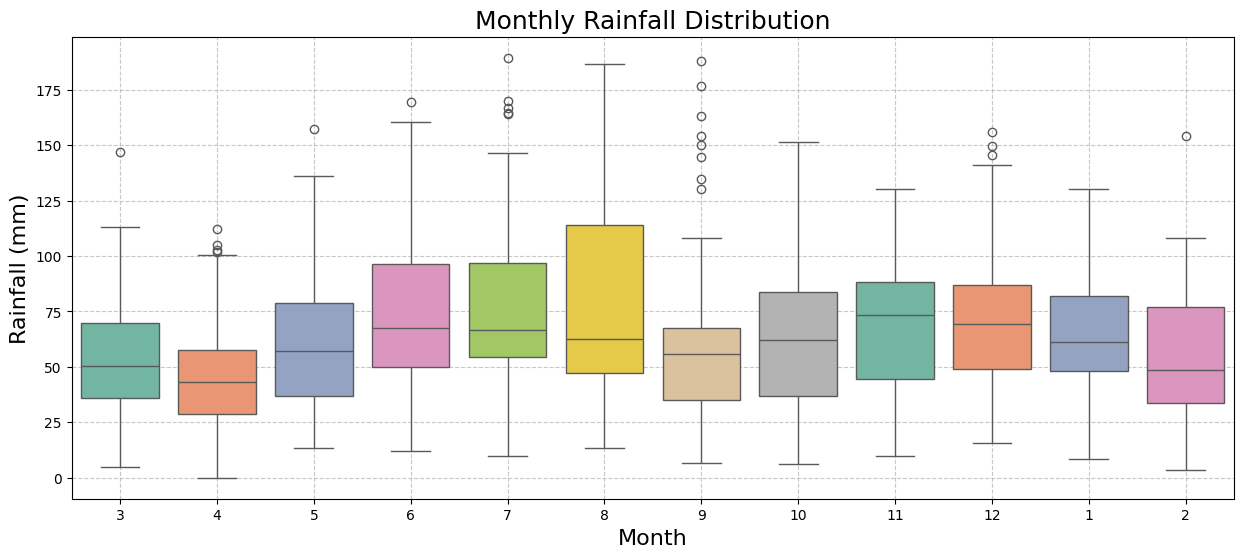

In [34]:
# Box Plot
plt.figure(figsize=(15, 6))
sns.boxplot(x="Month", y="Rainfall_mm", data=df_clean, palette="Set2")
plt.title("Monthly Rainfall Distribution", fontsize=18)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Rainfall (mm)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()